# Random Forests Intuition & Model Building

![](https://i.imgur.com/N8aIuRK.jpg)

# The following topics are covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting & hyperparameter tuning
- Making predictions on single inputs

# Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


# Importing Necesary Libraries and setting the notebook style prefferences.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Importing and Overviewing the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .

In [2]:
raw_df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We can also easily visualise the missing values using `missingno` package

<AxesSubplot:>

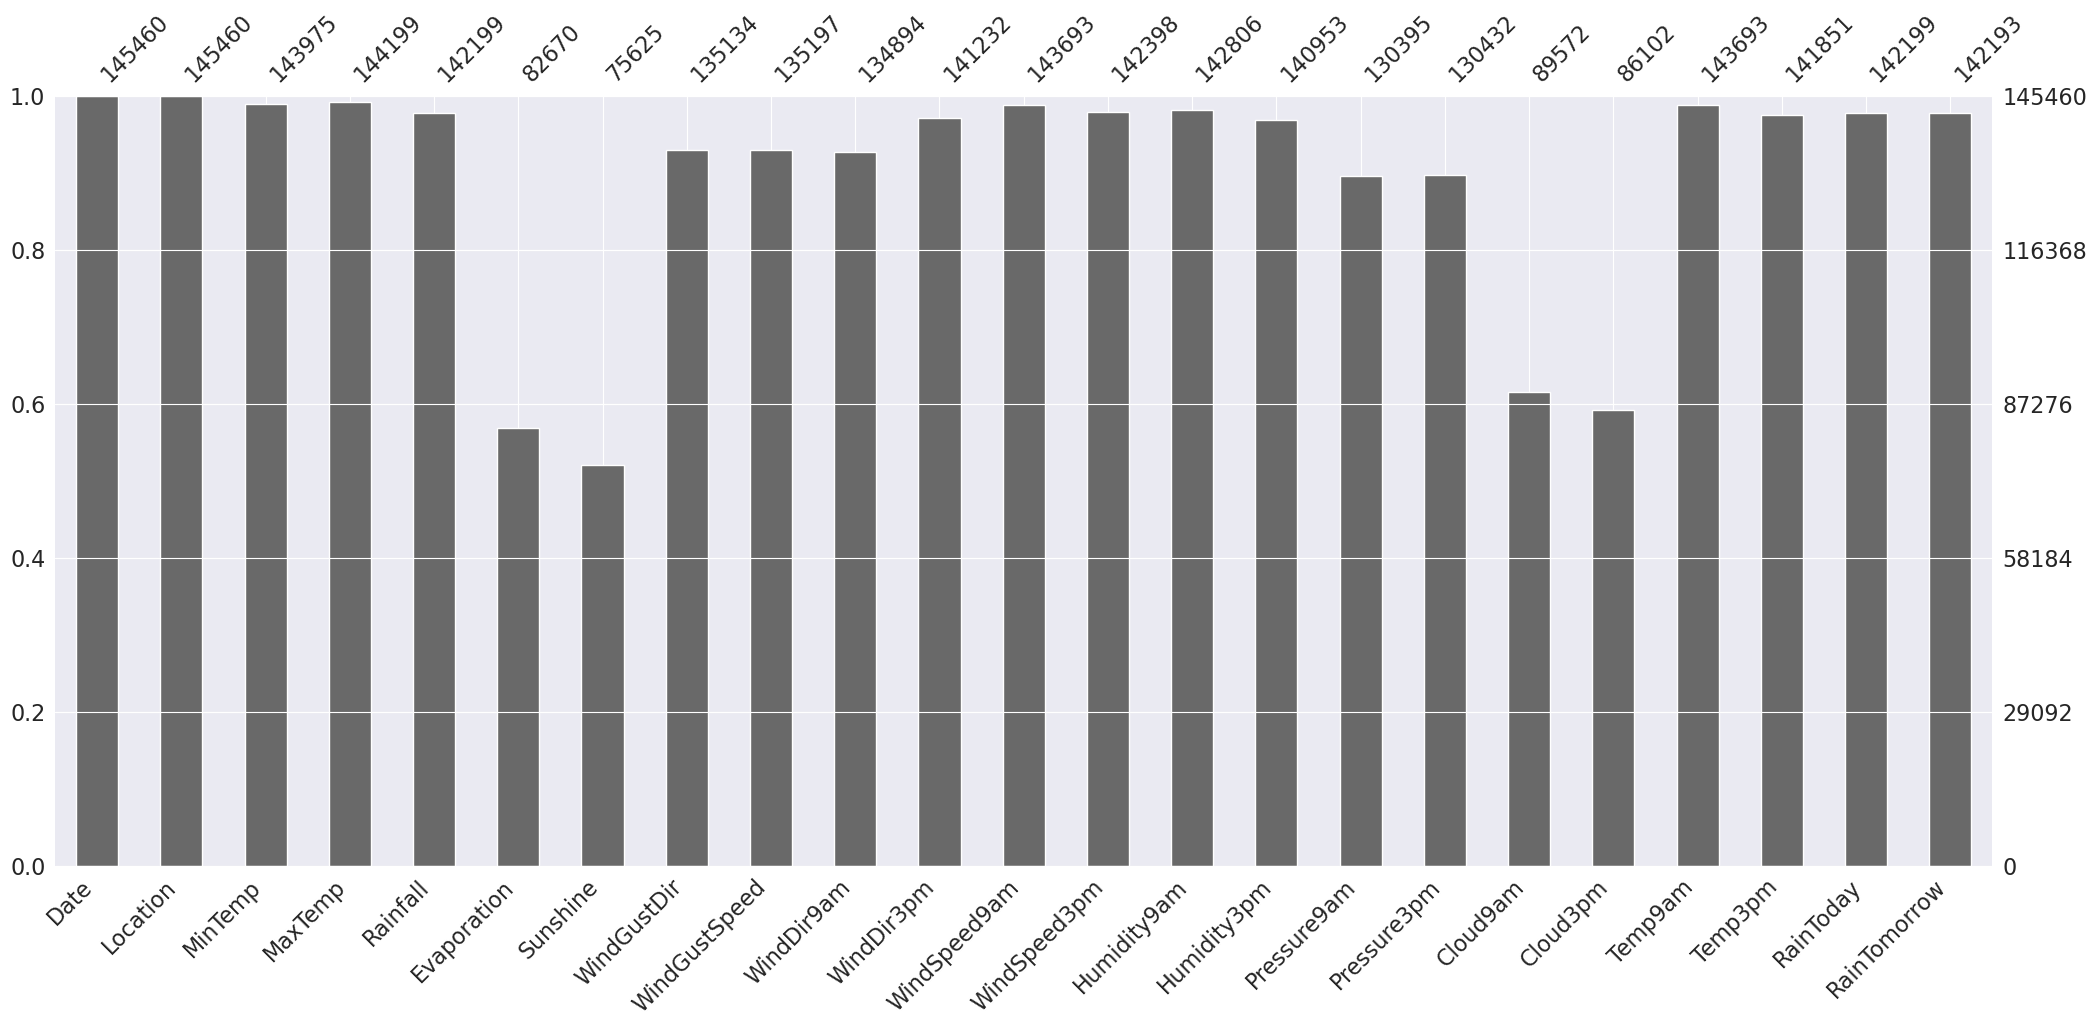

In [5]:
import missingno as msno

#we have 3 options bar graph,matrix and heatmap. I'm going with bar graph.

msno.bar(raw_df)

Let's also see the `descriptive statistics` of the dataset.

In [6]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


We can try to visualise the outliers to get an basic idea.

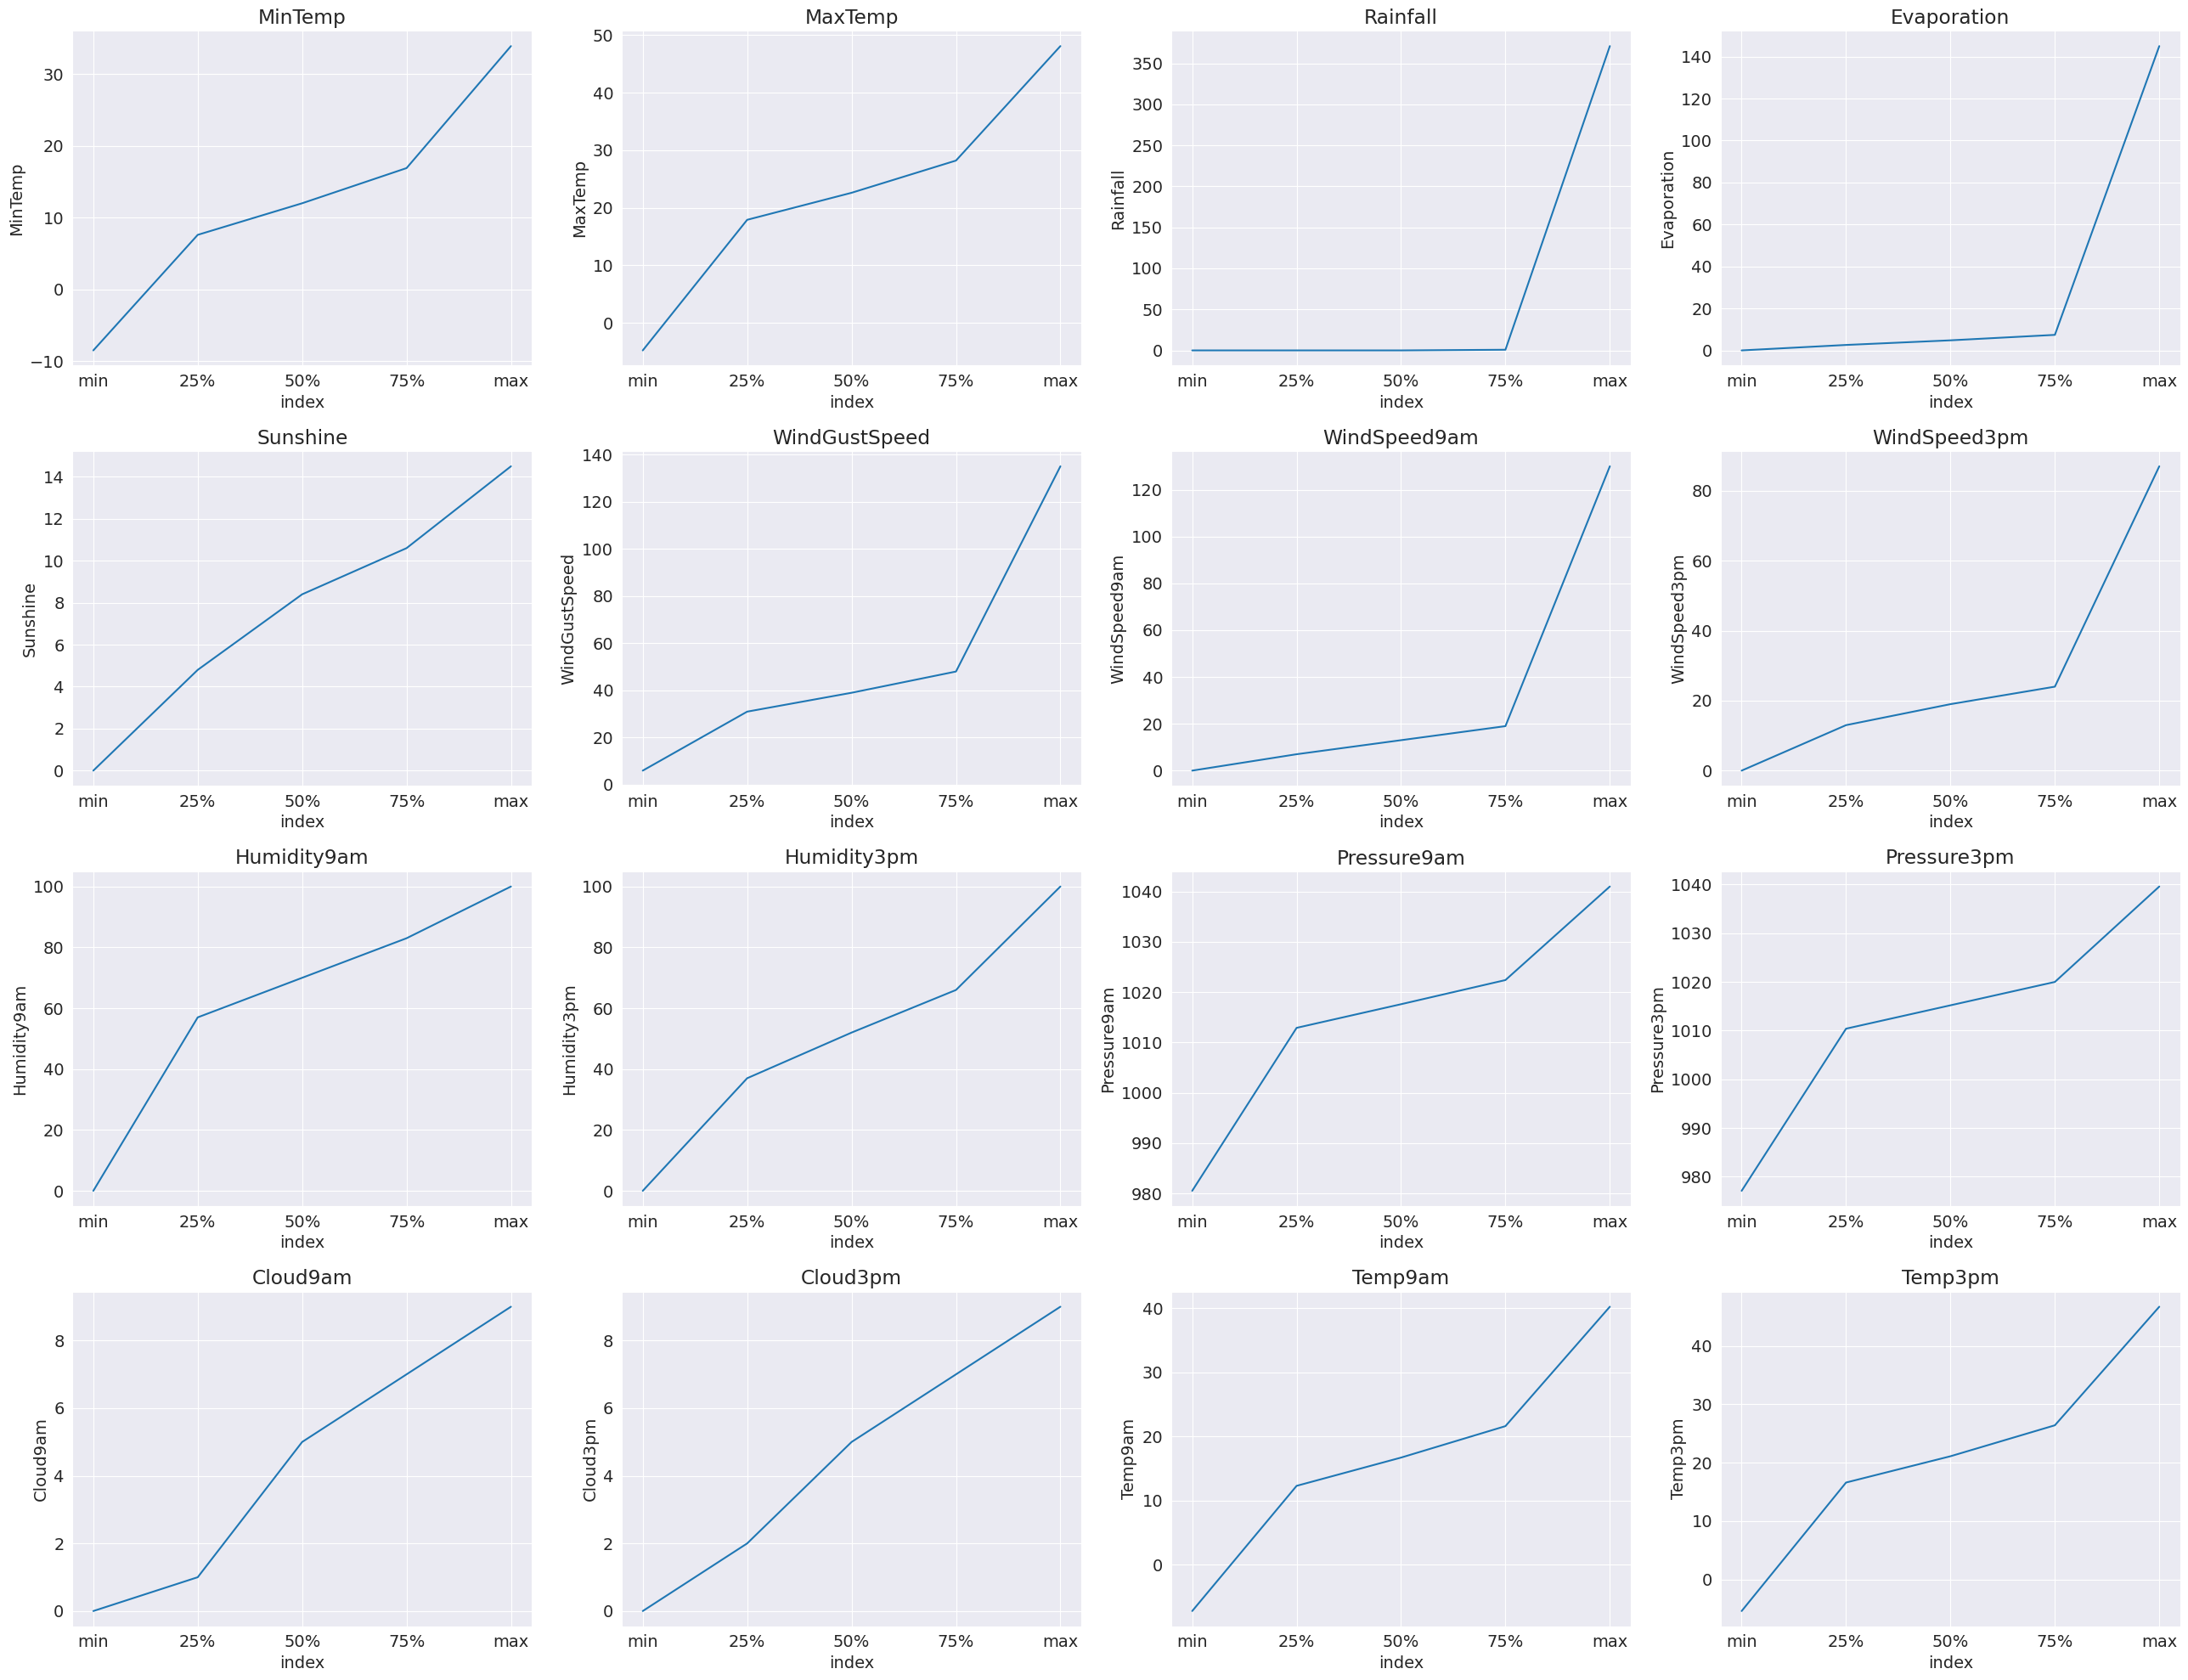

In [7]:
import matplotlib.pyplot as plt   #u can ignore this code and skip this step this is just to visualise the data distribution.
import seaborn as sns

# Compute summary statistics for numeric columns
describe_num_df = raw_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
# To remove 'mean' and 'std' from index
describe_num_df = describe_num_df[~describe_num_df['index'].isin(['mean', 'std'])]


# Create a grid of subplots
fig, axes = plt.subplots(nrows=4
                         , ncols=4, figsize=(26, 20))

# Plot each numeric column on a separate subplot
for i, ax in zip(describe_num_df.columns[1:], axes.flatten()):
    sns.lineplot(x="index", y=i, data=describe_num_df, ax=ax)
    ax.set_title(i)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

As we can see of how the data in each column is destributed we can see that the columns like "$Rainfall$" ,"$Evaporation$" seems to have outliers or uneven data distribution. with most of the data lie at one range the rest of the few will lie in a range which is not relevant. This is what we can outliers or any special cases that needs attention. If these things aren't considered while building the model this will skew the data drastically.

**Let's drop any rows where the value of the target column RainTomorrow in empty. This is because the column which which wanna predict cannot be empty. If one want's to impute the missing values they can but it might skew the predicts futher more and generally it is not recommended. ALso we don't have many NA values so it is better to drop them.**

In [8]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

That got reduced from `145460` to `142193` still we have got a plenty of data to work with.

# Exploratory Data Analysis

<AxesSubplot:xlabel='RainToday', ylabel='Count'>

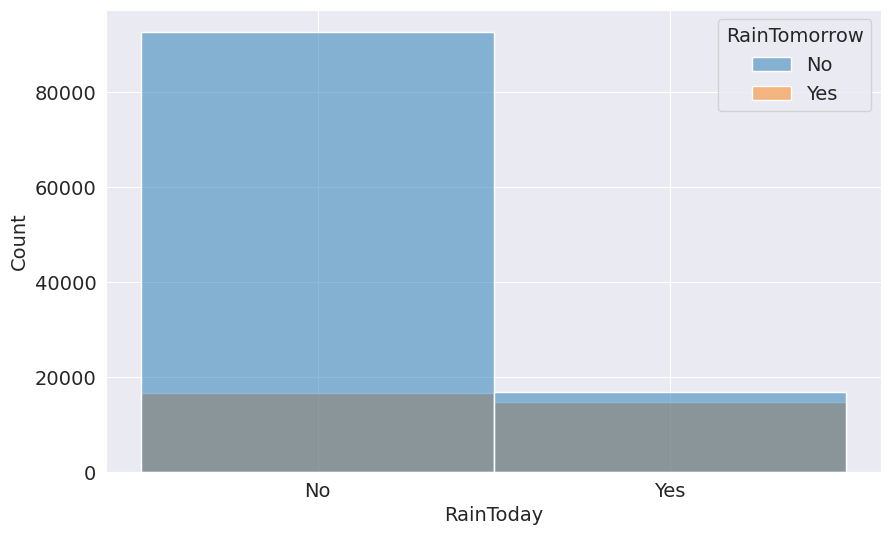

In [9]:
sns.histplot(data=raw_df,x='RainToday',hue='RainTomorrow')

**Note: This is a type of unbalanced dataset. This can lead to biased models, where the algorithm is more likely to predict the majority class, and less likely to predict the minority class. This can be problematic when the minority class is of interest, as it can result in false negatives or inaccurate predictions. This is importing to know about this while building an machine learning model. Read more about this [HERE](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning).**

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

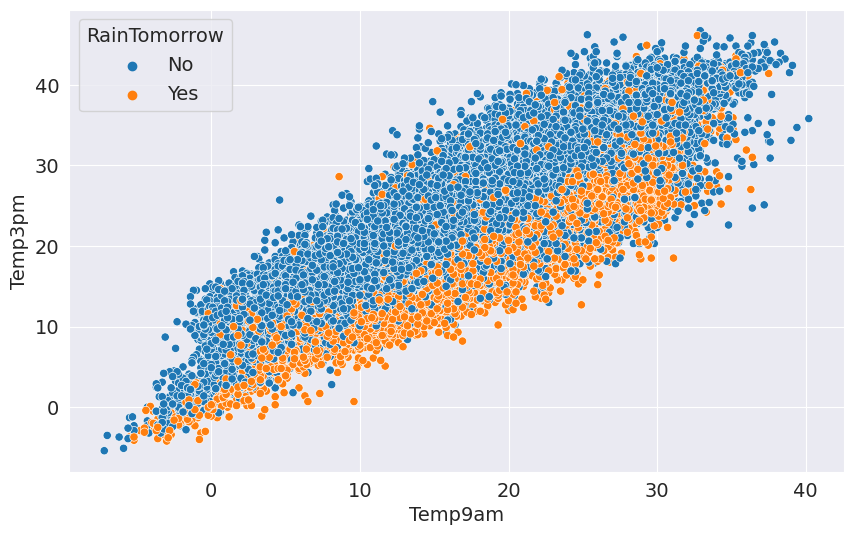

In [10]:
sns.scatterplot(data=raw_df,x='Temp9am',y='Temp3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

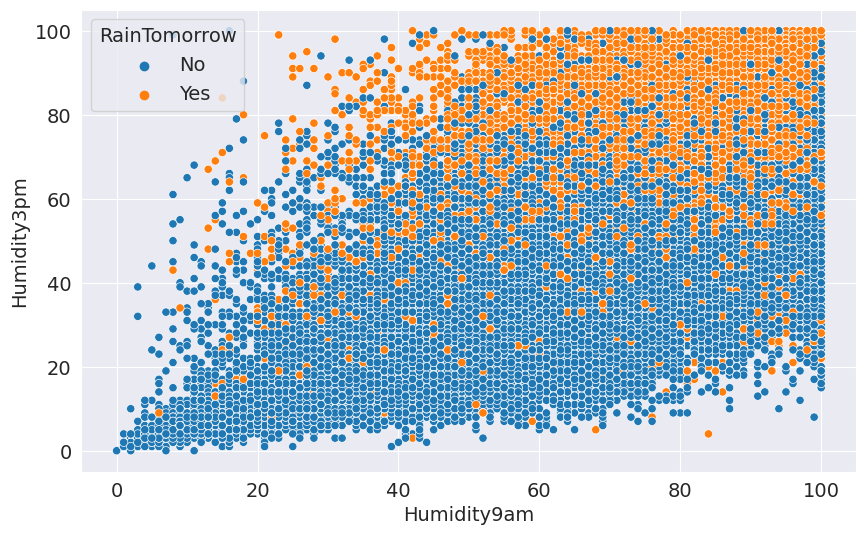

In [11]:
sns.scatterplot(data=raw_df,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

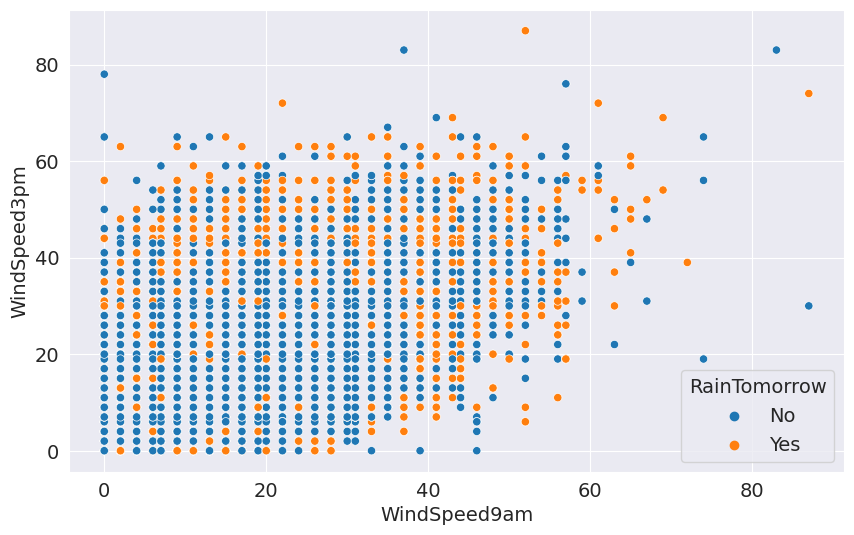

In [12]:
sns.scatterplot(data=raw_df,x='WindSpeed9am',y='WindSpeed3pm',hue='RainTomorrow')

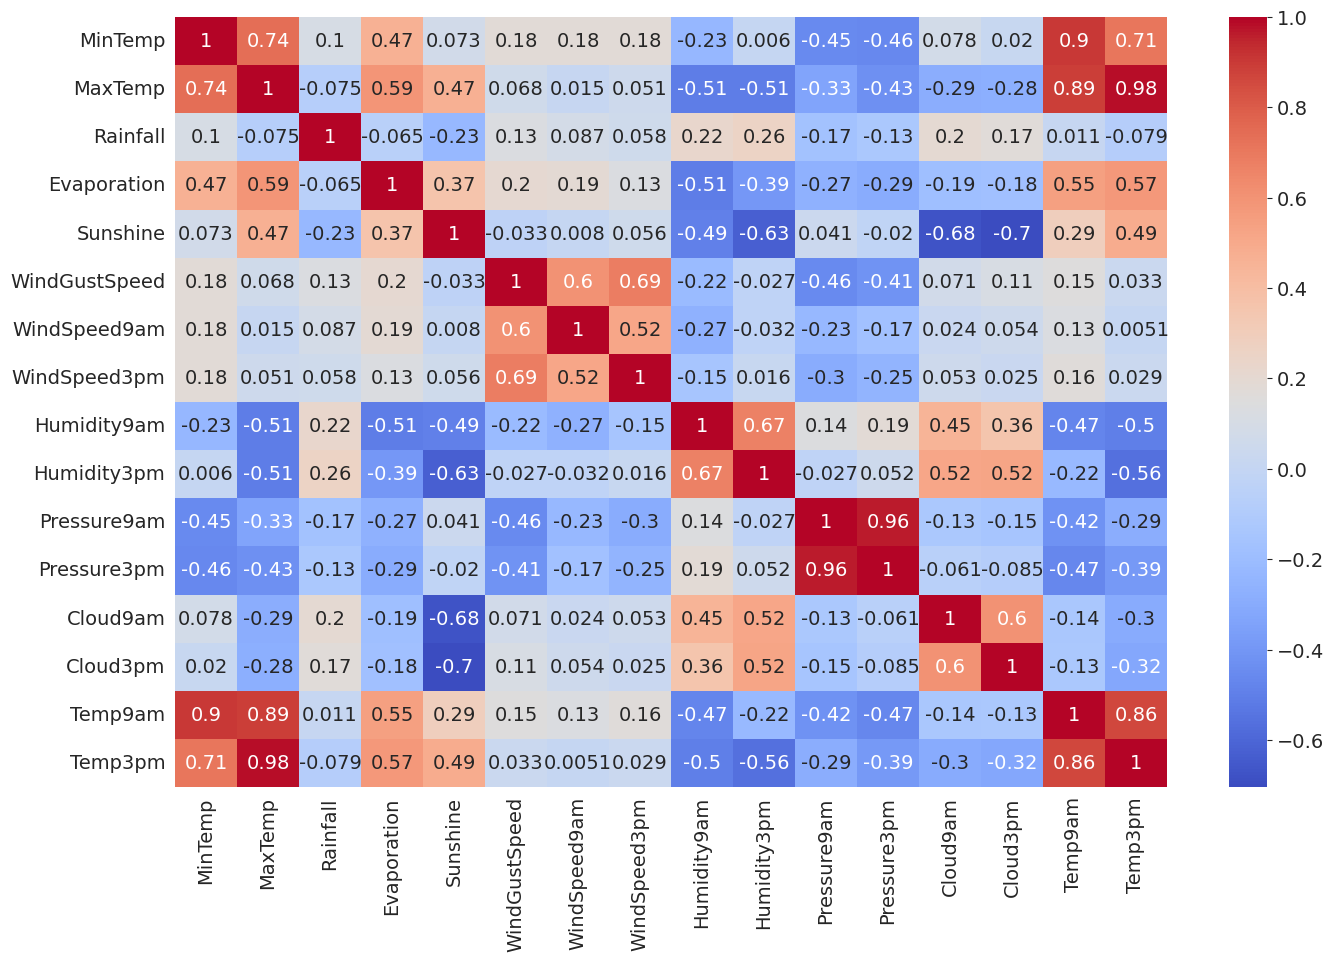

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(raw_df.corr(), cmap='coolwarm',annot=True)
plt.show()

# Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

# Training, Validation and Test Sets

**While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.**

**We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.**

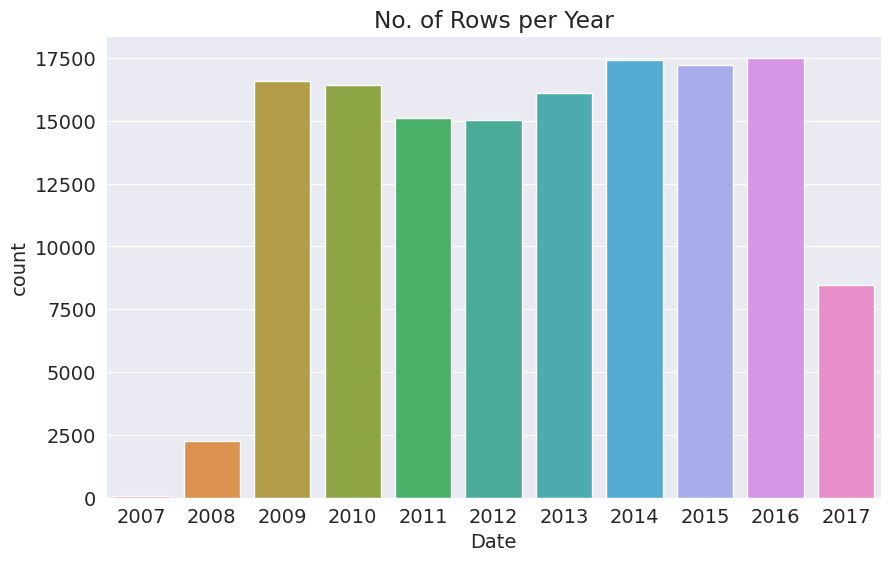

In [14]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [15]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [16]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


# Input and Target Columns

Let's identify the input and target columns.

### Note:
Below i'm using a method by which:

1. ***I'll create a list of column names extracted from my source dataset likelist(dataset_name.columns) . This will create a list of column names I wish to extract.***

2. ***Now i can store this list in some value like name_of_list. Then i can use this stored list of column names to act like a filter on any dataset that contains similar column names. This is actually usefull that you don't have to modify the dataframe each time.***

Below i've implemented what i explained till the end of this notebook. This is a pretty handy method.

In [17]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [18]:
train_inputs = train_df[input_cols].copy() #spliting train dataset to input and target columns
train_targets = train_df[target_col].copy()

In [19]:
val_inputs = val_df[input_cols].copy()  #spliting validation dataset to input and target columns
val_targets = val_df[target_col].copy()

In [20]:
test_inputs = test_df[input_cols].copy()  #spliting test dataset to input and target columns
test_targets = test_df[target_col].copy()

**Let's also identify the numeric and categorical columns.**

In [21]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() #same columns to list method. but here extracting numerical columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist() #same columns to list method. but here extracting categorical columns

In [22]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [23]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# Imputing missing numeric values

There are quite a lot of ways we can impute the missing values and it totally depnds on the requirement. `SimpleImputer` is one of the handy package than `sklearn` has to offer and even this packages as several way to impute. you can read about those [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

Imputing using mean is the simple and basic approach one will be doing. the steps are given below but i'm gonna use another method from SimpleImputer for a change.

`from sklearn.impute import SimpleImputer`

`imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])`

`train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols]) val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols]) test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])`

In [24]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

I'm Using a mentod called `KNNImputer` which used to impute values based on other surrounding similar values. Technically this should be better than just imputing mean values for every columns with missing values. **The KNN imputation algorithm works by identifying the k nearest neighbors of each observation with missing values. These neighbors are identified based on the similarity of their feature values to the feature values of the observation with the missing values. Once the nearest neighbors are identified, the missing values are imputed by taking the average (for continuous variables) or the mode (for categorical variables) of the corresponding feature values of the neighbors.**

**The KNN imputer is particularly useful when dealing with datasets with missing values, as it can help fill in these gaps to provide a more complete dataset for analysis. However, it is important to note that KNN imputation has its limitations, particularly when dealing with datasets with a high number of missing values or when the underlying data is complex and high-dimensional.** You can read about it [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

In [26]:
from sklearn.impute import KNNImputer

knn_imputer=KNNImputer(n_neighbors=5)

In [27]:
knn_imputer.fit(raw_df[numeric_cols]) #i'm trainin it on raw_df but you can train on train,val or test datasets too.

KNNImputer()

In [28]:
from tqdm import tqdm

# Loop through each dataset and impute the missing values while displaying a loading bar
for data in [train_inputs, val_inputs, test_inputs]:
    with tqdm(total=len(numeric_cols), desc="Imputing missing values") as pbar:
        # Impute the missing values for each numeric column
        for col in numeric_cols:
            data[col] = knn_imputer.fit_transform(data[[col]])
            pbar.update(1)

Imputing missing values: 100%|██████████| 16/16 [01:07<00:00,  4.25s/it]


In [29]:
test_inputs[numeric_cols].isna ().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

Another important step is to _scale numerical features_. In the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower. Again similar to imputing there are several ways to scale features available in sklearn. You can learn more about [Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). Here i'm using one of the methods called `Normalizer`. I've also given an example for `MinMaxScaler`. Information on how these work and their differences can be read in the sklearn link given above.

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(raw_df[numeric_cols])`

`train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])`

In [30]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.2,-3.2,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,988.1,982.2,0.0,0.0,-6.2,-4.0
max,31.9,45.4,247.2,70.4,14.5,135.0,87.0,74.0,100.0,100.0,1039.3,1037.3,8.0,8.0,37.5,42.8


As you can see the spread is very high and uneven. So, using the `Normalizer` i'm gonna try to bring down the values to a particular range for eg. 0 to 1. Reason i've choosen `Normalizer` is cause it scales each data point in a feature space to have unit norm (i.e., Euclidean length or L2 norm). Read more about the performance Here. If you wanna read more but the 'QuantileTransformer' itself head [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

The Normalizer is a preprocessing step available in scikit-learn (sklearn) library that scales each data point in a feature space to have unit norm (i.e., Euclidean length or L2 norm). Here are some benefits of using Normalizer in scaling data:

1. It is useful when working with distance-based algorithms such as k-nearest neighbors (k-NN) and clustering algorithms, where the distance between data points is used to measure their similarity.
2. It can help to normalize data that has different units and scales, making them comparable and improving the performance of some machine learning algorithms.
3. It can be used to avoid numerical instabilities that may occur when performing operations involving very large or small values.
4. It can reduce the impact of outliers, as it scales the data relative to its magnitude rather than its absolute value.
5. It can improve the interpretability of the model by making the feature weights more comparable and easier to interpret.

Overall, Normalizer is a useful preprocessing technique for scaling data and can be beneficial for improving the performance and interpretability of machine learning models.

In [33]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

pt.fit(raw_df[numeric_cols])

PowerTransformer()

In [34]:
train_inputs[numeric_cols] = pt.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = pt.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = pt.transform(test_inputs[numeric_cols])

In [35]:
train_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-3.619653,-5.253029,-0.676962,-2.643413,-1.886315,-4.320751,-2.080687,-2.948910,-2.637059,-2.730111,-4.856364,-4.967751,-1.624802,-1.731387,-4.107755,-5.227451
max,3.268864,3.237051,1.919963,5.266757,1.892913,4.329105,5.126498,5.440822,1.801098,2.235292,3.438513,3.541897,1.485588,1.583269,3.422291,3.278524


As you can the spread is significantly reduced. Even now some columns is having a high spread. That can be cause of the how `PowerTransformer` works as it takes in account of the outiers as well. This again is a test and the perfomance can only evaluated by the accuracy of the end model or by trying different scaling methods than goes along well with the ML model.

# Encoding Categorical Data

Another important step is to encode categorical data. why? Read below:

One Hot Encoding is a technique used in machine learning to convert categorical data into a numerical format that can be used for further analysis or model training.

In One Hot Encoding, each categorical variable is transformed into a binary vector with a length equal to the number of categories in that variable. Each category is represented by a single bit in the vector, where the bit corresponding to the category is set to 1 and all other bits are set to 0.

For example, suppose we have a categorical variable "color" with three categories: red, green, and blue. In One Hot Encoding, this variable would be transformed into a binary vector of length 3, with the following values:

red: [1 0 0] green: [0 1 0] blue: [0 0 1]

One Hot Encoding is important because many machine learning algorithms cannot directly handle categorical data. By converting categorical variables into numerical vectors, One Hot Encoding allows us to use these variables in models and algorithms that require numerical data.

Additionally, One Hot Encoding avoids the issues that can arise from assigning numerical values to categorical data. If we assigned numerical values to the categories in the "color" variable, we might accidentally create an artificial ordering or hierarchy among the categories that doesn't actually exist. One Hot Encoding preserves the categorical nature of the data, allowing us to use it more accurately in our analyses.

You can read more about different encoding strategies [HERE](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html).

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols]) #i'm calling and fittig the onehotencoder in a single step.

In [37]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) #this outputs the names of each of encoded columns.

In [38]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

***These warning are about our train,test and val datasets getting too much crowded with intrduction of new columns. Actually directly encoding on the working dataset is not a common practise. Generally as mentioned in the warnings copying encoded columns to another dataset is recomended. See the dataset after encoding below.***

In [39]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,1.268054,1.938207,-0.676962,0.432714,-0.037023,ENE,1.054689,NaN,ESE,-2.080687,-1.430365,-1.213861,-1.706451,-0.608735,-0.863065,0.882715,-0.512447,1.384852,2.075630,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,1.343235,1.424949,0.430650,0.432714,-0.037023,SSE,0.810594,SSE,SE,-0.449235,-0.092985,-0.838778,-1.026538,-0.925420,-0.975245,1.187564,1.250458,1.192735,1.414012,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.966300,0.013475,1.540097,0.432714,-0.037023,ENE,0.682942,ESE,ENE,-0.202822,2.042932,-0.436270,0.752480,-0.525615,-0.072488,1.187564,1.250458,0.745941,-0.287367,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.799586,0.097137,1.895082,0.432714,-0.037023,SSE,0.052823,SE,SSE,-0.449235,-0.092985,0.214923,0.660112,0.019802,0.169357,1.187564,1.250458,0.354399,0.016331,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data. 
Since i was using a list of columns instead of modifying the actual data i can simply combine the ist to create new ones and use as a new filter list.

In [40]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [41]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,1.268054,1.938207,-0.676962,0.432714,-0.037023,1.054689,-2.080687,-1.430365,-1.213861,-1.706451,-0.608735,-0.863065,0.882715,-0.512447,1.384852,2.075630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,1.343235,1.424949,0.430650,0.432714,-0.037023,0.810594,-0.449235,-0.092985,-0.838778,-1.026538,-0.925420,-0.975245,1.187564,1.250458,1.192735,1.414012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.966300,0.013475,1.540097,0.432714,-0.037023,0.682942,-0.202822,2.042932,-0.436270,0.752480,-0.525615,-0.072488,1.187564,1.250458,0.745941,-0.287367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.799586,0.097137,1.895082,0.432714,-0.037023,0.052823,-0.449235,-0.092985,0.214923,0.660112,0.019802,0.169357,1.187564,1.250458,0.354399,0.016331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually. Learn how to train a Decision Tree [HERE](https://www.kaggle.com/code/sridharstreaks/decision-trees-intution-model-building#Scaling-Numeric-Features).

# Training a Random Forest

**While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.**

**The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "_wisdom of the crowd_":**

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

Random Forest is an ensemble learning method that combines multiple decision trees to improve the predictive performance of a model. The intuition behind the Random Forest model can be explained as follows:

1. Decision trees: Decision trees are a popular machine learning algorithm that is easy to interpret and visualize. They work by recursively splitting the data into subsets based on the value of a selected feature until a stopping criterion is reached. This process creates a tree-like model that can be used to make predictions.

2. Ensemble learning: Ensemble learning is a technique that combines multiple models to improve the predictive performance of a single model. The idea is that by combining the predictions of several models, the errors of individual models cancel out, leading to better overall performance.

3. Randomness: The key idea behind Random Forest is to introduce randomness into the process of building decision trees. Specifically, Random Forest builds multiple decision trees using different subsets of the data and different subsets of the features. This randomness helps to prevent overfitting and increases the diversity of the models in the ensemble.

4. Aggregation: Once the individual decision trees are built, the predictions from all the trees are combined (or aggregated) to make a final prediction. This aggregation can take the form of a simple majority vote (for classification problems) or an average (for regression problems).

The overall intuition behind Random Forest is to create a large number of diverse decision trees that can collectively make accurate predictions. The randomness introduced into the process helps to prevent overfitting and increase the diversity of the models, which in turn improves the overall predictive performance. Read more about `RandomForest` [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [HERE](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)

You can also follow the video intution of Randomforests [HERE](https://www.youtube.com/watch?v=v6VJ2RO66Ag) and [HERE](https://youtu.be/J4Wdy0Wc_xQ).

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers by using multiple threads on the cpu to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [43]:
%%time
model.fit(X_train, train_targets)

CPU times: user 44.1 s, sys: 243 ms, total: 44.4 s
Wall time: 11.8 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In scikit-learn (sklearn), `model.score()` is a method used to evaluate the performance of a machine learning model. The _score()_ method returns the coefficient of determination R^2 of the prediction, which is a measure of how well the model is fitting the data.

The coefficient of determination R^2 is a value between 0 and 1, with higher values indicating a better fit. A score of 1 indicates that the model is able to perfectly predict the target variable, while a score of 0 indicates that the model is not able to predict the target variable at all.

The score() method takes two arguments: X and y, where X is the feature data and y is the target data. The method uses the trained model to make predictions on the feature data X, and then compares the predictions to the actual target data y. The R^2 value is calculated as the proportion of the variance in the target variable that is explained by the model.

In [44]:
model.score(X_train, train_targets)

0.9999595910615429

In [45]:
model.score(X_val, val_targets)

0.8547965875457025

**Once again as we saw in `Decision Trees`, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?**

If this was a single descision tree then this would a `overfit` learn more about overfitting in my previous [notebook](https://www.kaggle.com/code/sridharstreaks/decision-trees-intution-model-building?scriptVersionId=127577600&cellId=89)

**This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:**

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


Ensembling is a machine learning technique that involves combining multiple models to improve the predictive performance of a single model. The basic idea behind ensembling is to use the strengths of individual models and combine them in a way that minimizes their weaknesses.

There are two main types of ensembling:

1. Bagging (Bootstrap Aggregating): In this technique, multiple models are trained independently on different subsets of the training data. The predictions from each model are then combined (averaged or majority vote) to make a final prediction. The idea behind bagging is to reduce the variance of individual models and improve the overall stability and accuracy of the ensemble.
The most popular bagging ensemble methods are:

2. Random Forest: This method combines multiple decision trees trained on different subsets of data and features.
Extra Trees: This method is similar to Random Forest, but with additional randomness introduced in the feature selection process.
Boosting: In this technique, multiple weak models are trained sequentially, with each subsequent model learning from the errors of the previous model. The idea behind boosting is to reduce the bias of individual models and improve the overall predictive performance of the ensemble.

The most popular boosting ensemble methods are:

1. AdaBoost: This method trains multiple weak models, with each subsequent model giving more weight to the misclassified data points of the previous model.
2. Gradient Boosting: This method trains multiple decision trees sequentially, with each subsequent tree learning from the errors of the previous tree.

Ensembling can significantly improve the performance of machine learning models and is widely used in many applications. However, ensembling comes with some drawbacks, such as increased complexity and longer training times. Additionally, ensembling may not always improve the performance of a model, especially if the individual models are not diverse enough or if there is high variance in the data.

Read more [HERE](https://scikit-learn.org/stable/modules/ensemble.html).

We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [46]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.95, 0.05],
       [0.97, 0.03],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05]])

We can see that the collective probabilty is more spreaded as compared to a decision tree's [probability](https://www.kaggle.com/code/sridharstreaks/decision-trees-intution-model-building?scriptVersionId=127577600&cellId=82) which was very badly overfitted.

We can can access individual decision trees using `model.estimators_`. the code below tries to acces the first decision tree.

In [52]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

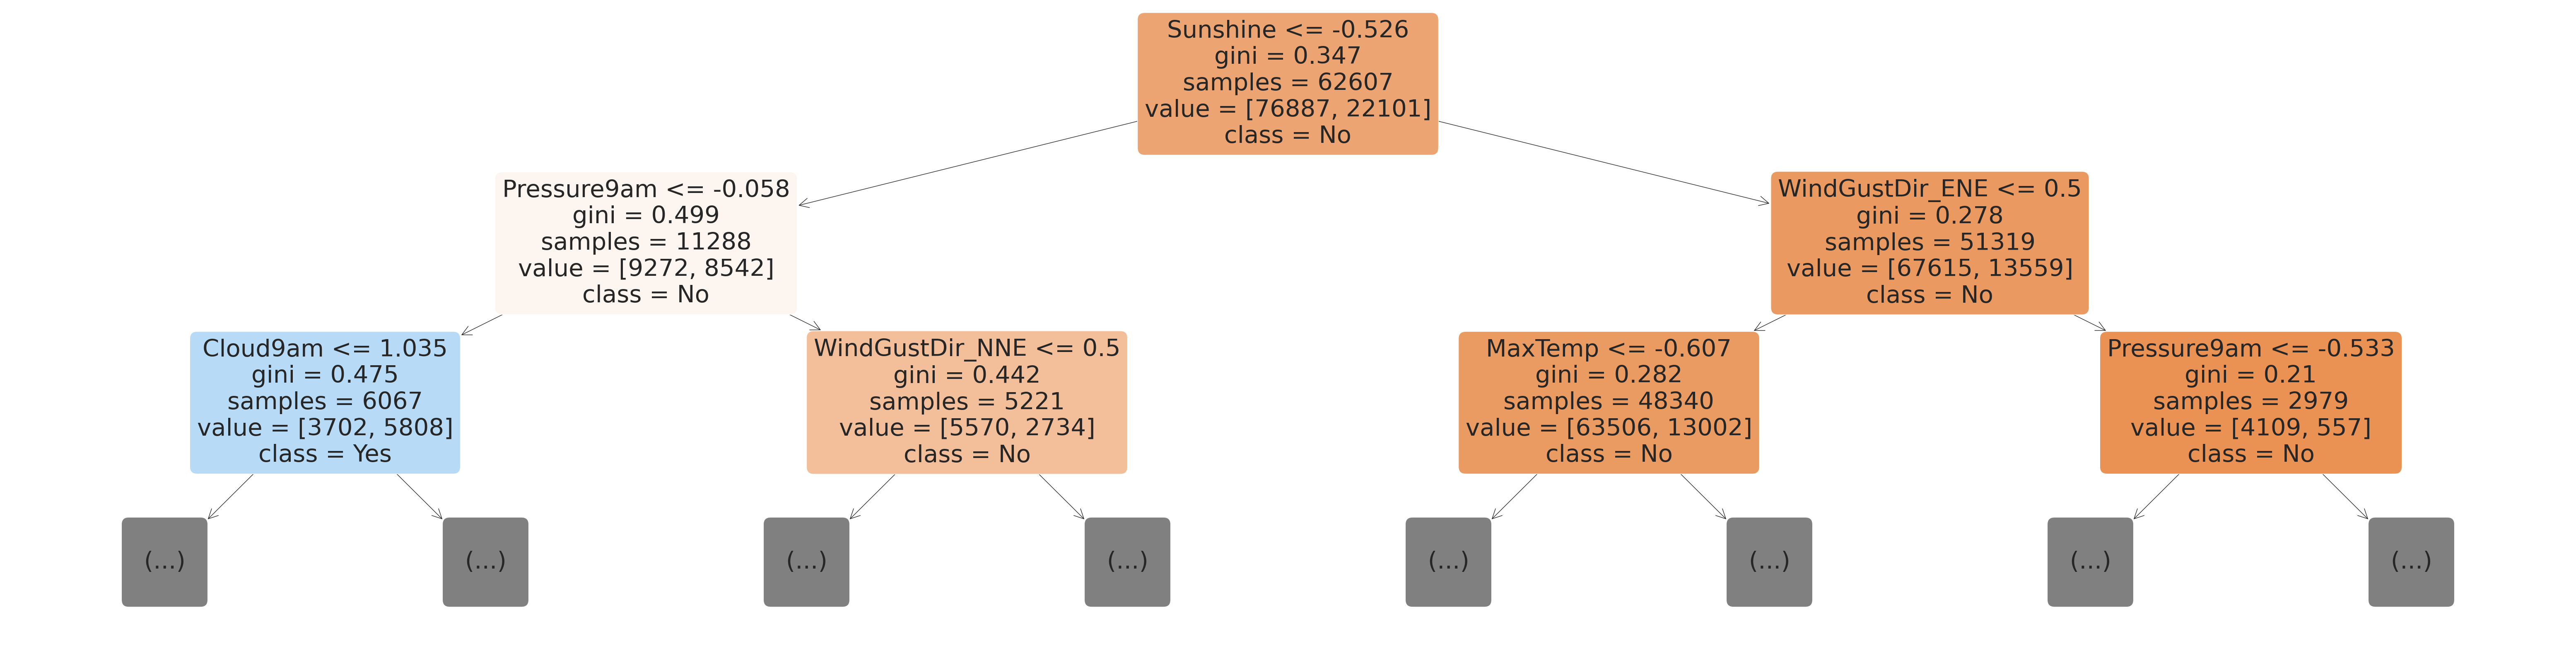

In [53]:
plt.figure(figsize=(80,20)) #we are plotting the first decision tree
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

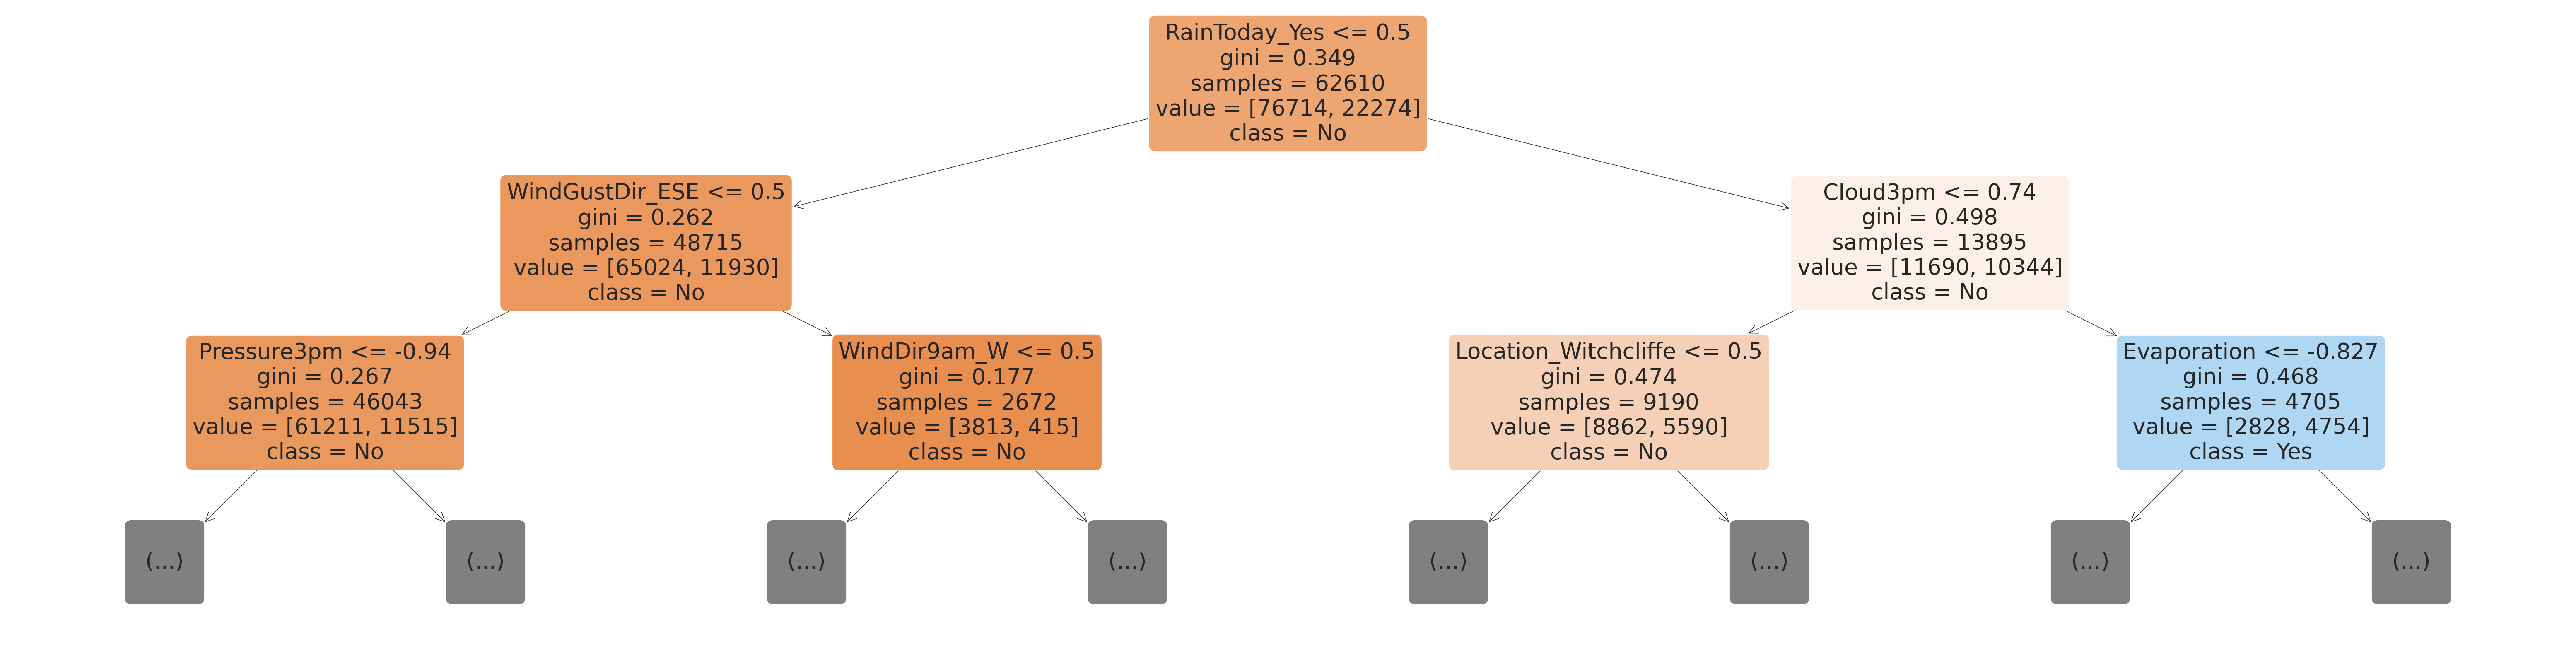

In [54]:
plt.figure(figsize=(80,20)) #This is the plotting of 20th decision tree
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

As we can see that the two decision trees starts with different features as thier important ones. This is reason that we have good accuracry on the validation sets. as it tries to be more generalised rather than getting accustomed.

In [55]:
len(model.estimators_)  #this gives the total decision trees used in the random forest model.

100

we can see that this model has trained 100 decision trees and gives a collective output. This can be tuned with other parameters which we'll see in the hyper-parameters section. But `100` is the default value for the no. of decision trees.

Just like decision tree, random forests also assign an "importance" to each feature, ***by combining the importance values from individual trees.***

In [56]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

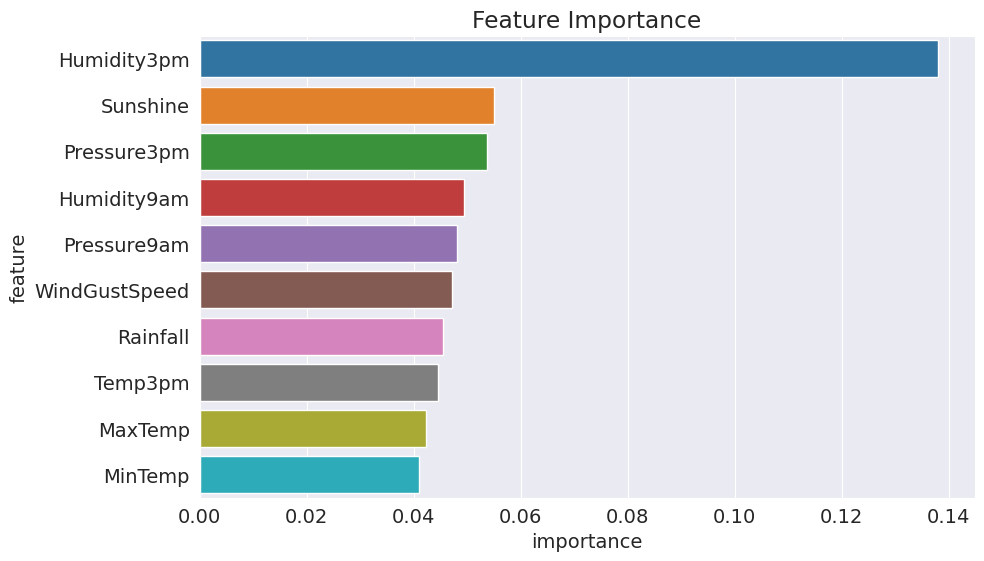

In [57]:
importance_df.head(10)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a [single decision tree](https://www.kaggle.com/code/sridharstreaks/decision-trees-intution-model-building?scriptVersionId=127577600&cellId=103).

# Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning algorithm in order to optimize its performance. Hyperparameters are parameters that are set before the learning process begins and are not learned from the data. They control the behavior of the algorithm and can have a significant impact on its performance. The process of hyperparameter tuning involves selecting a range of values for each hyperparameter, and then systematically evaluating the performance of the model with each combination of hyperparameters. This can be done using various techniques, such as grid search, random search, or Bayesian optimization.

* Grid search: In grid search, a set of hyperparameters is defined, and a range of values for each hyperparameter is specified. The algorithm then trains and evaluates the model using all possible combinations of hyperparameters in the specified ranges.

* Random search: In random search, a set of hyperparameters is defined, and a range of values for each hyperparameter is specified. The algorithm then selects a random combination of hyperparameters and evaluates the model. This process is repeated for a specified number of iterations.

* Bayesian optimization: In Bayesian optimization, a probabilistic model is used to predict the performance of the model for different combinations of hyperparameters. The algorithm then selects the next combination of hyperparameters based on the predictions of the probabilistic model. This process is repeated until the optimal combination of hyperparameters is found.

The goal of hyperparameter tuning is to find the best combination of hyperparameters that maximizes the performance of the model on a validation set. The performance metric used to evaluate the model can vary depending on the problem, but common metrics include accuracy, precision, recall, F1-score, and mean squared error.

Hyperparameter tuning is an important step in building machine learning models, as it can have a significant impact on the performance of the model. However, hyperparameter tuning can also be time-consuming and computationally expensive, and there is always a risk of overfitting to the validation set. Therefore, it is important to balance the time and resources allocated to hyperparameter tuning with the overall goals and constraints of the project.

In [ ]:
?RandomForestClassifier #this will give you all the parameters that can be tuned with thier description.

Let's create a base model with which we can compare models with tuned hyperparameters.

In [59]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets) #Named it base model so that we can compare it with the Hypertunred models

In [60]:
base_train_acc = base_model.score(X_train, train_targets) #taking the score from the train and validation datasets
base_val_acc = base_model.score(X_val, val_targets)

In [61]:
base_accs = base_train_acc, base_val_acc  #Storing it in a variable for ease of access
base_accs

(0.9999595910615429, 0.8547965875457025)

We can use this as a benchmark for hyperparmeter tuning.

Forthcoming are a series of Hyper-parameters which we are gonna modify for better tune our model.

# 1. `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. In Random Forest, n_estimators is the number of decision trees that are trained on different subsets of the data and features. Increasing n_estimators can lead to better performance, as the ensemble has more diversity and is less prone to overfitting. However, increasing n_estimators also increases the computational cost and training time of the model, so it is important to balance the number of trees with the available resources and the desired performance.


**10 estimators**

In [62]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10) #Training a model with only 10 Decision trees

model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [63]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9873014910898291, 0.8419708664616099)

In [64]:
base_accs

(0.9999595910615429, 0.8547965875457025)

We can see the model with `10 Decision Trees` perfomes bad compared to our `base model` as we restricted the model with only 10 trees. Let's increase the trees more than the default value to see what happens

**500 estimators**

In [66]:
%%time
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

CPU times: user 3min 41s, sys: 1.98 s, total: 3min 43s
Wall time: 57.6 s


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [67]:
model.score(X_train, train_targets),model.score(X_val, val_targets)

(0.9999797955307714, 0.855725146538216)

In [68]:
base_accs

(0.9999595910615429, 0.8547965875457025)

Training with `500` trees significantly increased the training time. but failed to yield any better accuracy. So, even this gives a slight better accuracy the training time is high thus we can choose any values less than 500 and still can get this accuracy.

# 2. `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the `maximum depth` and `max. no leaf nodes` of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

`max_depth` and `max_leaf_nodes` are hyperparameters that control the depth and size of decision trees in machine learning models.

`max_depth` controls the maximum depth of the decision tree, which is the number of nodes from the root to the furthest leaf. Increasing `max_depth` can lead to more complex trees that can capture more intricate patterns in the data. However, deeper trees are also more prone to overfitting, as they may memorize the training data instead of generalizing to new data. Therefore, it is important to choose an appropriate value for `max_depth` to balance the model's complexity and its ability to generalize to new data.

`max_leaf_nodes` controls the maximum number of terminal nodes (or leaves) in the decision tree. Setting a smaller value for `max_leaf_nodes` can lead to simpler trees that are less prone to overfitting, as they have fewer branches and decision points. However, smaller values may also limit the ability of the model to capture complex patterns in the data. Therefore, it is important to choose an appropriate value for `max_leaf_nodes` based on the complexity of the problem and the available data.

Both `max_depth` and `max_leaf_nodes` are hyperparameters that need to be tuned to optimize the performance of decision tree-based models. The optimal values depend on the specific problem and dataset, and can be determined through techniques such as grid search or random search.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


Let's define a helper function `test_params` to make it easy to test hyperparameters. which can take multiple parameters that we can test on.

In [69]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [70]:
test_params(max_depth=5)

(0.8197559300117186, 0.8219488131855377)

In [71]:
test_params(max_depth=26)

(0.9814826039519942, 0.8553189019789914)

In [72]:
test_params(max_leaf_nodes=2**5)

(0.8313937042873883, 0.832743311473507)

In [73]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8547965875457025)

In [74]:
base_accs # no max depth or max leaf nodes

(0.9999595910615429, 0.8547965875457025)

As we can see after testing a bunch of `max_depth` and `max_leaf_nodes`, The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

# 3. `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split. When building a decision tree, the algorithm selects the best feature to split on at each node based on a criterion such as information gain or Gini impurity. max_features limits the number of features that can be considered for each split, which can help to reduce the complexity of the model and prevent overfitting.

Choosing an appropriate value for max_features is important for optimizing the performance of decision tree-based models. In general, using smaller values of max_features can help to prevent overfitting and improve generalization to new data. However, setting max_features too low can also reduce the ability of the model to capture complex patterns in the data. Therefore, it is important to experiment with different values of max_features using techniques such as grid search or random search to find the optimal value for the specific problem and dataset.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [75]:
test_params(max_features='log2')

(0.9999494888269285, 0.8539260634902212)

In [76]:
test_params(max_features=3)

(0.9999393865923142, 0.8500377227090709)

In [77]:
test_params(max_features=6)

(0.9999494888269285, 0.8539260634902212)

In [78]:
base_accs

(0.9999595910615429, 0.8547965875457025)

# 4. `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

`min_samples_split` and `min_samples_leaf` are hyperparameters that control the minimum number of samples required to split an internal node and the minimum number of samples required to be at a leaf node in decision tree-based models.

`min_samples_split` controls the minimum number of samples required to split an internal node. If a node has fewer samples than `min_samples_split`, it will not be split, and the splitting process will stop. Setting a higher value for `min_samples_split` can prevent overfitting by creating simpler trees with fewer splits, but it can also lead to underfitting if the value is set too high, as the model may not be able to capture important patterns in the data.

`min_samples_leaf` controls the minimum number of samples required to be at a leaf node. If a split would create a leaf node with fewer samples than `min_samples_leaf`, the split will not be made, and the node will become a leaf instead. Setting a higher value for `min_samples_leaf` can also prevent overfitting by forcing the model to create leaves with more samples, but it can also lead to underfitting if the value is set too high.

Choosing appropriate values for `min_samples_split` and `min_samples_leaf` is important for optimizing the performance of decision tree-based models. In general, setting higher values for these hyperparameters can help to prevent overfitting and improve the generalization ability of the model, but it can also result in simpler models that may not capture complex patterns in the data. The optimal values for these hyperparameters depend on the specific problem and dataset, and can be determined through techniques such as grid search or random search.

In [79]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9627328565078596, 0.8547965875457025)

In [81]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501333494969087, 0.8450467181243109)

In [82]:
base_accs

(0.9999595910615429, 0.8547965875457025)

# 5. `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

`min_impurity_decrease` is a hyperparameter in decision tree-based models that controls the minimum impurity decrease required to split an internal node. Impurity is a measure of the homogeneity of the labels in a node, and is commonly measured by criteria such as Gini impurity or entropy. 

When building a decision tree, the algorithm selects the best feature to split on at each node based on a criterion such as information gain or Gini impurity. `min_impurity_decrease` controls the minimum amount of impurity decrease required to make a split at a node. If the impurity decrease is less than `min_impurity_decrease`, the node will not be split.

Setting a higher value for `min_impurity_decrease` can help to prevent overfitting by preventing splits that do not significantly reduce impurity, and thus reducing the complexity of the model. However, it can also result in underfitting if the value is set too high and important patterns in the data are missed.

Choosing an appropriate value for `min_impurity_decrease` depends on the specific problem and dataset, and can be determined through techniques such as grid search or random search. In general, `min_impurity_decrease` is less commonly used than other hyperparameters such as `max_depth` or `min_samples_split`, but it can be useful in some situations, especially when dealing with noisy or low-quality data.

In [83]:
test_params(min_impurity_decrease=1e-7)

(0.9995352972077424, 0.8536358888050607)

In [84]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [85]:
base_accs

(0.9999595910615429, 0.8547965875457025)

# 6.`bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

`bootstrap` and `max_samples` are hyperparameters in ensemble models that control the sampling strategy for creating each base estimator in the ensemble.

In bagging-based ensemble models such as Random Forests, `bootstrap` controls whether bootstrap samples are used to train each base estimator. If `bootstrap` is set to `True` (the default), each base estimator is trained on a random subset of the training data with replacement (i.e., a bootstrap sample). If `bootstrap` is set to `False`, each base estimator is trained on the entire training dataset. Setting `bootstrap` to `False` can lead to a simpler model with lower variance, but it may also lead to overfitting if the training dataset is small or noisy.

`max_samples` is another hyperparameter that controls the size of the random subset of the training data used to train each base estimator. It is expressed as a fraction of the total number of samples in the training dataset. For example, setting `max_samples` to 0.5 means that each base estimator is trained on a random subset of 50% of the training samples. By default, `max_samples` is set to `None`, which means that each base estimator is trained on the entire training dataset if `bootstrap` is set to `False`, and on a random subset with the same size as the training dataset if `bootstrap` is set to `True`.

Choosing appropriate values for `bootstrap` and `max_samples` is important for optimizing the performance of ensemble models. In general, using bootstrap samples and setting `max_samples` to less than 1 can help to reduce the variance of the model and prevent overfitting. However, it can also increase the computational cost of training the model. The optimal values for these hyperparameters depend on the specific problem and dataset, and can be determined through techniques such as grid search or random search.

In [86]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8546805176716383)

In [87]:
base_accs

(0.9999595910615429, 0.8547965875457025)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [88]:
test_params(max_samples=0.9)

(0.9997878530730998, 0.8559572862863444)

In [89]:
base_accs

(0.9999595910615429, 0.8547965875457025)

Learn more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

# 7.`class_weight`

In classification problems, `class_weight` is a hyperparameter that is used to balance the contribution of each class to the model's loss function during training. It is particularly useful in situations where the classes are imbalanced, i.e., when one or more classes have significantly fewer examples than others.

By default, most classification models assume that all classes have equal weight and contribute equally to the model's loss function. However, in imbalanced classification problems, this can lead to poor performance because the model may be biased towards the majority class and fail to accurately predict the minority class. `class_weight` provides a way to adjust the contribution of each class to the loss function so that the model gives more weight to the minority class.

`class_weight` can be specified in several ways, depending on the specific algorithm and library being used. Some common methods include:

- "balanced": This sets the class weight to be proportional to the inverse of the number of samples in each class. In other words, each class is given a weight of 1/n_samples, where n_samples is the number of samples in that class. This ensures that the contribution of each class to the loss function is roughly equal, regardless of the class distribution in the training data.

- A dictionary: This allows the user to manually set the weight for each class. For example, if there are three classes with labels 0, 1, and 2, the dictionary might be {0: 1.0, 1: 2.0, 2: 1.5}, indicating that class 1 should be weighted more heavily than the other classes.

Choosing an appropriate value for `class_weight` depends on the specific problem and dataset, and can be determined through techniques such as grid search or random search. In general, `class_weight` can be a useful tool for improving the performance of classification models in imbalanced datasets.

In [90]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [91]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8532876791828681)

In [92]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999494888269285, 0.8521269804422262)

In [93]:
base_accs

(0.9999595910615429, 0.8547965875457025)

# Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [94]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [95]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9921303592354629, 0.8546805176716383)

In [96]:
base_accs

(0.9999595910615429, 0.8547965875457025)

The accuracy is more or less the same even after tuning random forest parameters. Depeneding on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning. 

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.

# Strategy for Tuning Hyperparameters

Here's a good strategy for tuning hyperparameters:

1. Tune the most important/impactful hyperparameter first e.g. n_estimators

2. With the best value of the first hyperparameter, tune the next most impactful hyperparameter

3. And so on, keep training the next most impactful parameters with the best values for previous parameters...

4. Then, go back to the top and further tune each parameter again for further marginal gains

Keep your ideas and experiments organized using an experiment tracking sheet: https://bit.ly/mltrackingsheet


Your first objective should be make the training loss as low as possible (even if the validation loss is very large), and then try to regularize the model to slowly decrease the valiadation loss while increasing the training loss.


Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter

# Test Accuracy

Finally, let's also compute the accuracy of our model on the test set.

In [97]:
model.score(X_test, test_targets)

0.8444598444598445

***It is worth noting that the test accuracy is comparatively lower than the validation accuracy, which is consistent with our prior observation in the validation set. This highlights the importance of performing thorough hyperparameter tuning, gaining a comprehensive understanding of the dataset and the problem at hand, and carefully selecting the relevant features to incorporate in the model. By carefully considering these factors, it is possible to achieve a high degree of accuracy on the test dataset.***

# Summary and References

The following topics were covered in this tutorial:

- Importing a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting & hyperparameter tuning
- Making predictions on single inputs



We also introduced the following terms:

* Decision tree
* Random forest
* Overfitting
* Hyperparameter
* Hyperparameter tuning
* Ensembling
* Generalization
* Bootstrapping


Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://www.kaggle.com/c/home-credit-default-risk/discussion/64821


# Revision Questions
1.	What is a decision tree model?
2.	What is <code>DecisionTreeClassifier()</code>?
3.	Can we use decision tree only for Classifier? 
4.	How can you visualize the decision tree?
5.	What is <code>max_depth</code> in decision tree?
6.	What is gini index?
7.	What is feature importance?
8.	What is overfitting? What could be the reason for overfitting?
9.	What is hyperparameter tuning?
10.	What is one way to control the complexity of the decision tree?
11.	What is a random forest model?
12.	What is <code>RandomForestClassifier()</code>?
13.	What is <code>model.score()</code>?
14.	What is generalization?
15.	What is ensembling?
16.	What is <code>n_estimators</code> in hyperparameter tuning of random forests?
17.	What is underfitting?
18.	What does <code>max_features</code> parameter do?
19.	What are some features that help in controlling the threshold for splitting nodes in decision tree?
20.	What is bootstrapping? What is <code>max_samples</code> parameter in bootstrapping?
21.	What is <code>class_weight</code> parameter?
22.	You may or may not a see a significant improvement in the accuracy score with hyperparameter tuning. What could be the possible reasons for that?

# The End